<a href="https://colab.research.google.com/github/artfix3r/Cifar10/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
cifar10=tf.keras.datasets.cifar10
(x_train,y_train), (x_test,y_test)=cifar10.load_data()

In [ ]:
x_train,x_test=x_train/255.0 , x_test/255.0
y_train,y_test=y_train.flatten(),y_test.flatten()

In [ ]:
y_train.shape

(50000,)

In [ ]:
K=len(set(y_train))

In [ ]:
i=tf.keras.layers.Input(shape=x_train[0].shape)
x=tf.keras.layers.Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=tf.keras.layers.Conv2D(64,(3,3),strides=2,activation='relu')(x)
x=tf.keras.layers.Conv2D(128,(3,3),strides=2,activation='relu')(x)
x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dropout(0.5)(x)
x=tf.keras.layers.Dense(1024,activation='relu')(x)
x=tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(K,activation='softmax')(x)

In [ ]:
model=tf.keras.models.Model(i,x)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.3541 - loss: 1.7513 - val_accuracy: 0.5358 - val_loss: 1.2634
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5339 - loss: 1.2861 - val_accuracy: 0.6007 - val_loss: 1.1109
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5857 - loss: 1.1500 - val_accuracy: 0.6292 - val_loss: 1.0394
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6298 - loss: 1.0463 - val_accuracy: 0.6471 - val_loss: 1.0200
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6507 - loss: 0.9808 - val_accuracy: 0.6722 - val_loss: 0.9158
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6766 - loss: 0.9048 - val_accuracy: 0.6854 - val_loss: 0.8980
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6920 - loss: 0.8611 - val_accuracy: 0.6911 - val_loss: 0.8884
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7114 - loss: 0.8097

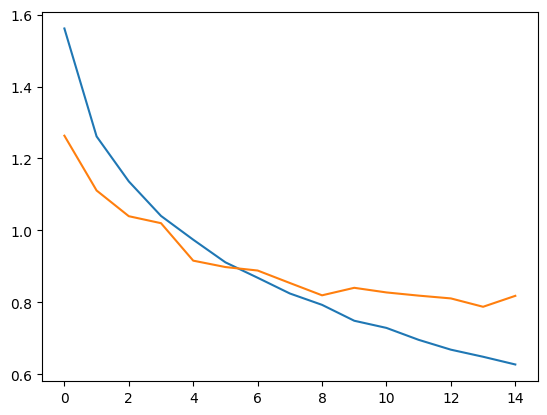

In [ ]:
 plt.plot(r.history['loss'],label='loss')
 plt.plot(r.history['val_loss'],label='val_loss')

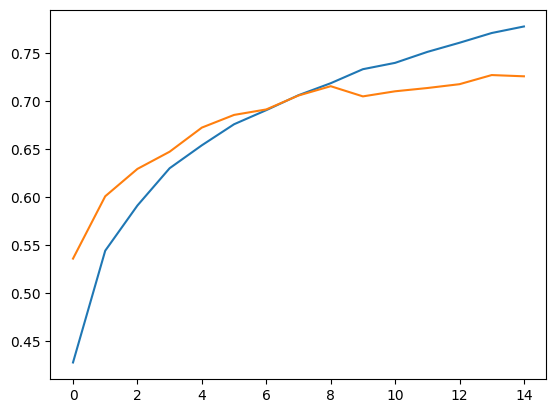

In [ ]:
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')